<a href="https://colab.research.google.com/github/flaviowu/btc-c14-g4/blob/main/notebooks/Limpeza_de_dados_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza de dados

Este notebook tem por objetivo fazer uma limpeza preliminar dos dados do dataset obtidos em [Mercari Price Suggestion Challenge](https://www.kaggle.com/competitions/mercari-price-suggestion-challenge/overview) a fim de utilizá-lo para uma análise exploratória e geração de visualizações e insights.

## Configuração de ambiente

### Montagem de armazenamento

In [60]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Importação de Bibliotecas

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura do arquivo

In [62]:
base_folder = 'drive/MyDrive/BTC-Dados-G4'
file_name = 'train_raw.csv'

In [63]:
df = pd.read_csv(f'{base_folder}/{file_name}')
df.head()

,Unnamed: 0,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock
0,0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2018-6-18,27
1,1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,2018-3-18,15
2,2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2018-10-25,14
3,3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,2018-2-20,1
4,4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,2018-4-16,13


## Limpeza

1.482.535 de observações, 11 colunas

In [64]:
df.shape

(1482535, 11)

In [65]:
df.columns

Index(['Unnamed: 0', 'train_id', 'name', 'item_condition_id', 'category_name',
       'brand_name', 'price', 'shipping', 'item_description', 'date', 'stock'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1482535 non-null  int64  
 1   train_id           1482535 non-null  int64  
 2   name               1482535 non-null  object 
 3   item_condition_id  1482535 non-null  int64  
 4   category_name      1476208 non-null  object 
 5   brand_name         849853 non-null   object 
 6   price              1482535 non-null  float64
 7   shipping           1482535 non-null  int64  
 8   item_description   1482531 non-null  object 
 9   date               1482535 non-null  object 
 10  stock              1482535 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 124.4+ MB


### Indexes redundantes

In [67]:
df.describe()

,Unnamed: 0,train_id,item_condition_id,price,shipping,stock
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01,1.178544e+01
std,4.279711e+05,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01,1.056072e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.706335e+05,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00
50%,7.412670e+05,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00
75%,1.111900e+06,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01
max,1.482534e+06,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01


Colunas ```'Unnamed: 0'``` e ```'train_id'``` serão dropadas pois são indexes, o primeiro gerado na exportação dos dados na fonte e o segundo, registro de index original que não necessitamos.

In [68]:
df.drop(columns=['Unnamed: 0', 'train_id'], inplace=True)
df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2018-6-18,27
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,2018-3-18,15
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2018-10-25,14
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,2018-2-20,1
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,2018-4-16,13


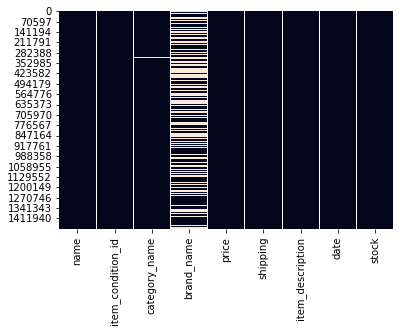

In [69]:
sns.heatmap(data=df.isna(), cbar=False)

### Valores Nulos

In [70]:
df.isna().value_counts()

name   item_condition_id  category_name  brand_name  price  shipping  item_description  date   stock
False  False              False          False       False  False     False             False  False    846982
                                         True        False  False     False             False  False    629222
                          True           True        False  False     False             False  False      3457
                                         False       False  False     False             False  False      2870
                          False          True        False  False     True              False  False         3
                                         False       False  False     True              False  False         1
dtype: int64

6327 valores nulos em ```category_name```

In [71]:
df.loc[ df.category_name.isna() == True ]['category_name'].shape

(6327,)

632682 valores nulos na coluna ```brand_name```.

Representam 42.68% das observações. 

In [72]:
df.loc[ df.brand_name.isna() == True ]['brand_name'].shape

(632682,)

In [73]:
print(f"Proporção de nulos: {round(df.loc[ df.brand_name.isna() == True ]['brand_name'].shape[0]/df.shape[0]*100, 2)}%")

Proporção de nulos: 42.68%


In [74]:
df.loc[ df.item_description.isna() == True ]

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock
511535,Shoes for Michelle,4,Kids/Girls 0-24 Mos/Shoes,NaN,9.0,0,NaN,2018-12-5,6
861230,Lipgloss,4,Beauty/Makeup/Lips,NaN,49.0,0,NaN,2018-2-26,1
1224924,Disney Minnie Head band,3,Women/Women's Accessories/Hair Accessories,Disney,9.0,0,NaN,2018-9-19,5
1264242,For Bianca,3,Women/Women's Accessories/Scarves & Wraps,NaN,10.0,1,NaN,2018-8-4,7


Vamos eliminar as linhas nulas ```item_description``` e ```category_name```.

In [75]:
index_to_drop = df.loc[ (df.item_description.isna() == True) | df.category_name.isna() == True ].index

df.drop(index_to_drop, inplace=True)

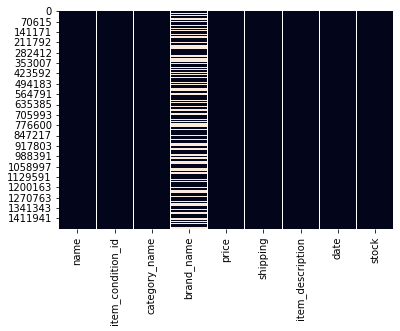

In [76]:
sns.heatmap(data=df.isna(), cbar=False)

## Separando as categorias

In [77]:
categories = df.category_name.str.split('/', expand=True)
categories.head()

,0,1,2,3,4
0,Men,Tops,T-shirts,None,None
1,Electronics,Computers & Tablets,Components & Parts,None,None
2,Women,Tops & Blouses,Blouse,None,None
3,Home,Home Décor,Home Décor Accents,None,None
4,Women,Jewelry,Necklaces,None,None


In [78]:
categories.columns = ['main_cat', 'sub_cat_1', 'sub_cat_2', 'sub_cat_3', 'sub_cat_4']
categories.head()

,main_cat,sub_cat_1,sub_cat_2,sub_cat_3,sub_cat_4
0,Men,Tops,T-shirts,None,None
1,Electronics,Computers & Tablets,Components & Parts,None,None
2,Women,Tops & Blouses,Blouse,None,None
3,Home,Home Décor,Home Décor Accents,None,None
4,Women,Jewelry,Necklaces,None,None


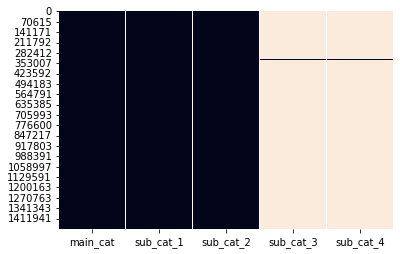

In [79]:
sns.heatmap(data=categories.isnull(), cbar=False)

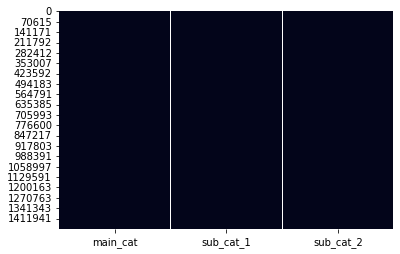

In [80]:
categories.drop(['sub_cat_3', 'sub_cat_4'], axis=1, inplace=True)
sns.heatmap(data=categories.isnull(), cbar=False)

In [81]:
df = pd.concat([df, categories], axis=1)

In [82]:
df.columns

Index(['name', 'item_condition_id', 'category_name', 'brand_name', 'price',
       'shipping', 'item_description', 'date', 'stock', 'main_cat',
       'sub_cat_1', 'sub_cat_2'],
      dtype='object')

In [83]:
df.shape

(1476204, 12)

In [84]:
df.drop('category_name', axis=1, inplace=True)
df.columns

Index(['name', 'item_condition_id', 'brand_name', 'price', 'shipping',
       'item_description', 'date', 'stock', 'main_cat', 'sub_cat_1',
       'sub_cat_2'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476204 entries, 0 to 1482534
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   name               1476204 non-null  object 
 1   item_condition_id  1476204 non-null  int64  
 2   brand_name         846982 non-null   object 
 3   price              1476204 non-null  float64
 4   shipping           1476204 non-null  int64  
 5   item_description   1476204 non-null  object 
 6   date               1476204 non-null  object 
 7   stock              1476204 non-null  int64  
 8   main_cat           1476204 non-null  object 
 9   sub_cat_1          1476204 non-null  object 
 10  sub_cat_2          1476204 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 135.2+ MB


In [86]:
df.describe()

,item_condition_id,price,shipping,stock
count,1.476204e+06,1.476204e+06,1.476204e+06,1.476204e+06
mean,1.907061e+00,2.674329e+01,4.476285e-01,1.178467e+01
std,9.033131e-01,3.860407e+01,4.972498e-01,1.056059e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00
50%,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00
75%,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01
max,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01


In [89]:
# df.to_csv(f'{base_folder}/train_clean_rev1.csv', index=False)
# df.to_csv(f'{base_folder}/train_clean_rev2.csv', index=False)